<a href="https://colab.research.google.com/github/shimjinaka/CODSOFT/blob/main/credict_card_fraud_detection_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
df1=pd.read_csv('/content/fraudTest.csv')
df2=pd.read_csv('/content/fraudTrain.csv')

In [ ]:
fulldata=pd.concat([df1,df2])

In [ ]:
fulldata.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
fulldata.isna().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


<Axes: xlabel='is_fraud', ylabel='count'>

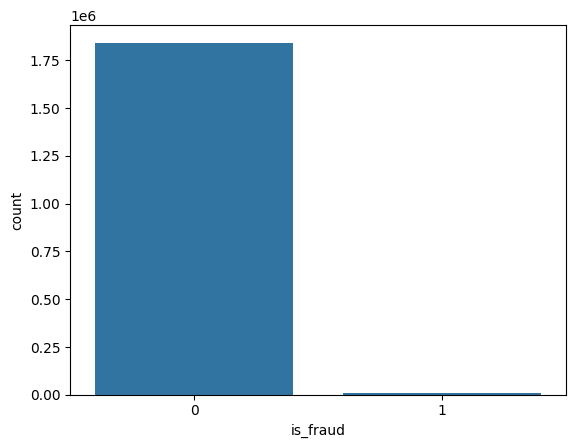

In [ ]:
sns.countplot(x='is_fraud',data=fulldata)

In [ ]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               

In [ ]:
fulldata.duplicated().sum()

0

In [ ]:
fraud=fulldata[fulldata["is_fraud"]==1]
not_fraud=fulldata[fulldata["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])

9651
1842743


In [ ]:
not_fraud=not_fraud.sample(fraud.shape[0])
data=pd.concat([fraud,not_fraud])
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437211,437211,2020-12-06 06:15:01,4451952084362894,fraud_Spencer-Runolfsson,misc_pos,35.78,Joseph,Davis,M,941 Adam Stravenue,...,34.5444,-102.1069,686,Petroleum engineer,1980-07-30,f8a81fc01a67300cadeade763de3b07c,1386310501,34.832783,-101.886443,0
341880,341880,2019-06-10 07:42:13,213112402583773,"fraud_Streich, Hansen and Veum",gas_transport,62.54,Ana,Howell,F,4664 Sanchez Common Suite 930,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,d3eb33770a23a2a4c88dbce5eaffc6db,1339314133,34.135106,-81.910164,0
414674,414674,2019-07-06 17:58:43,4710826438164847414,fraud_Lind-Buckridge,entertainment,132.05,Juan,Henry,M,9795 Lori Island Suite 346,...,48.8328,-108.3961,192,Further education lecturer,1964-01-04,178b3eb3dd14510bf5556134b985e617,1341597523,49.600891,-108.519843,0
964063,964063,2020-01-24 08:25:10,3568736585751727,fraud_Bogisich-Homenick,misc_net,85.52,Thomas,Cross,M,7566 Thompson Creek Apt. 827,...,41.8114,-93.4855,1195,Trading standards officer,1974-03-13,bb4842ff05d0a22b80e3652f142ec2ab,1359015910,41.130022,-93.908395,0


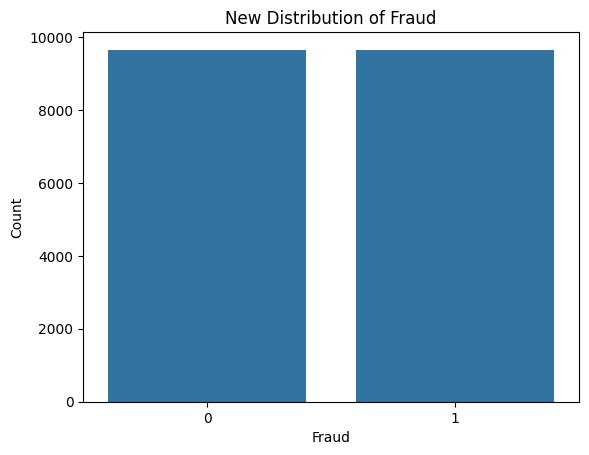

In [ ]:
fraud_counts=data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values)
plt.title('New Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [ ]:
print(data.columns)


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [ ]:
data.drop(columns=['Unnamed: 0', 'first', 'last', 'unix_time', 'street', 'gender', 'job', 'dob', 'city', 'state', 'trans_num', 'merchant'], inplace=True)
data

,trans_date_trans_time,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
1685,2020-06-21 22:06:39,3560725013359375,health_fitness,24.84,79759,31.8599,-102.7413,23,32.575873,-102.604290,1
1767,2020-06-21 22:32:22,6564459919350820,misc_net,780.52,53803,42.5545,-90.3508,1306,42.461127,-91.147148,1
1781,2020-06-21 22:37:27,6564459919350820,entertainment,620.33,53803,42.5545,-90.3508,1306,42.771834,-90.158365,1
1784,2020-06-21 22:38:55,4005676619255478,shopping_net,1077.69,70726,30.4590,-90.9027,71335,31.204974,-90.261595,1
1857,2020-06-21 23:02:16,3560725013359375,shopping_pos,842.65,79759,31.8599,-102.7413,23,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...
437211,2020-12-06 06:15:01,4451952084362894,misc_pos,35.78,79063,34.5444,-102.1069,686,34.832783,-101.886443,0
341880,2019-06-10 07:42:13,213112402583773,gas_transport,62.54,29819,34.0326,-82.2027,1523,34.135106,-81.910164,0
414674,2019-07-06 17:58:43,4710826438164847414,entertainment,132.05,59542,48.8328,-108.3961,192,49.600891,-108.519843,0
964063,2020-01-24 08:25:10,3568736585751727,misc_net,85.52,50073,41.8114,-93.4855,1195,41.130022,-93.908395,0


In [ ]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)


In [ ]:
data.dtypes

,0
cc_num,int64
category,object
amt,float64
zip,int64
lat,float64
long,float64
city_pop,int64
merch_lat,float64
merch_long,float64
is_fraud,int64


In [ ]:
data['category'].unique()

array(['health_fitness', 'misc_net', 'entertainment', 'shopping_net',
       'shopping_pos', 'misc_pos', 'grocery_pos', 'grocery_net',
       'personal_care', 'home', 'gas_transport', 'travel', 'food_dining',
       'kids_pets'], dtype=object)

In [ ]:
lb=LabelEncoder()
data['category']=lb.fit_transform(data['category'])

In [ ]:
data.dtypes

,0
cc_num,int64
category,int64
amt,float64
zip,int64
lat,float64
long,float64
city_pop,int64
merch_lat,float64
merch_long,float64
is_fraud,int64


In [ ]:
data.head()

,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
1685,3560725013359375,5,24.84,79759,31.8599,-102.7413,23,32.575873,-102.604290,1,21,6,2020,22,6
1767,6564459919350820,8,780.52,53803,42.5545,-90.3508,1306,42.461127,-91.147148,1,21,6,2020,22,32
1781,6564459919350820,0,620.33,53803,42.5545,-90.3508,1306,42.771834,-90.158365,1,21,6,2020,22,37
1784,4005676619255478,11,1077.69,70726,30.4590,-90.9027,71335,31.204974,-90.261595,1,21,6,2020,22,38
1857,3560725013359375,12,842.65,79759,31.8599,-102.7413,23,31.315782,-102.736390,1,21,6,2020,23,2


In [ ]:
num_columns=['amt','zip','city_pop','cc_num']
scaler=StandardScaler()
data[num_columns]=scaler.fit_transform(data[num_columns])

In [ ]:
x=data.drop('is_fraud',axis=1)
x

,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,trans_day,trans_month,trans_year,trans_hour,trans_minute
1685,-0.313920,5,-0.740144,1.156249,31.8599,-102.7413,-0.289024,32.575873,-102.604290,21,6,2020,22,6
1767,-0.311606,8,1.307153,0.196595,42.5545,-90.3508,-0.284721,42.461127,-91.147148,21,6,2020,22,32
1781,-0.311606,0,0.873164,0.196595,42.5545,-90.3508,-0.284721,42.771834,-90.158365,21,6,2020,22,37
1784,-0.313577,11,2.112249,0.822278,30.4590,-90.9027,-0.049848,31.204974,-90.261595,21,6,2020,22,38
1857,-0.313920,12,1.475476,1.156249,31.8599,-102.7413,-0.289024,31.315782,-102.736390,21,6,2020,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437211,-0.313234,9,-0.710505,1.130517,34.5444,-102.1069,-0.286801,34.832783,-101.886443,6,12,2020,6,15
341880,-0.316498,2,-0.638007,-0.690150,34.0326,-82.2027,-0.283993,34.135106,-81.910164,10,6,2019,7,42
414674,3.311839,0,-0.449690,0.408779,48.8328,-108.3961,-0.288458,49.600891,-108.519843,6,7,2019,17,58
964063,-0.313914,8,-0.575749,0.058688,41.8114,-93.4855,-0.285093,41.130022,-93.908395,24,1,2020,8,25


In [ ]:
y=data['is_fraud']
y

,is_fraud
1685,1
1767,1
1781,1
1784,1
1857,1
...,...
437211,0
341880,0
414674,0
964063,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [ ]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
Y_pred=model.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print('Accuracy:',accuracy_score(y_test, Y_pred))
print('Classification report:',classification_report(y_test, Y_pred))
print('F1 score:',f1_score(y_test, Y_pred))
print('Confusion matrix:',confusion_matrix(y_test, Y_pred))

Accuracy: 0.9684019684019683
Classification report:               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1952
           1       0.97      0.96      0.97      1909

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861

F1 score: 0.9678947368421053
Confusion matrix: [[1900   52]
 [  70 1839]]


Text(0.5, 1.0, 'Confusion Matrix')

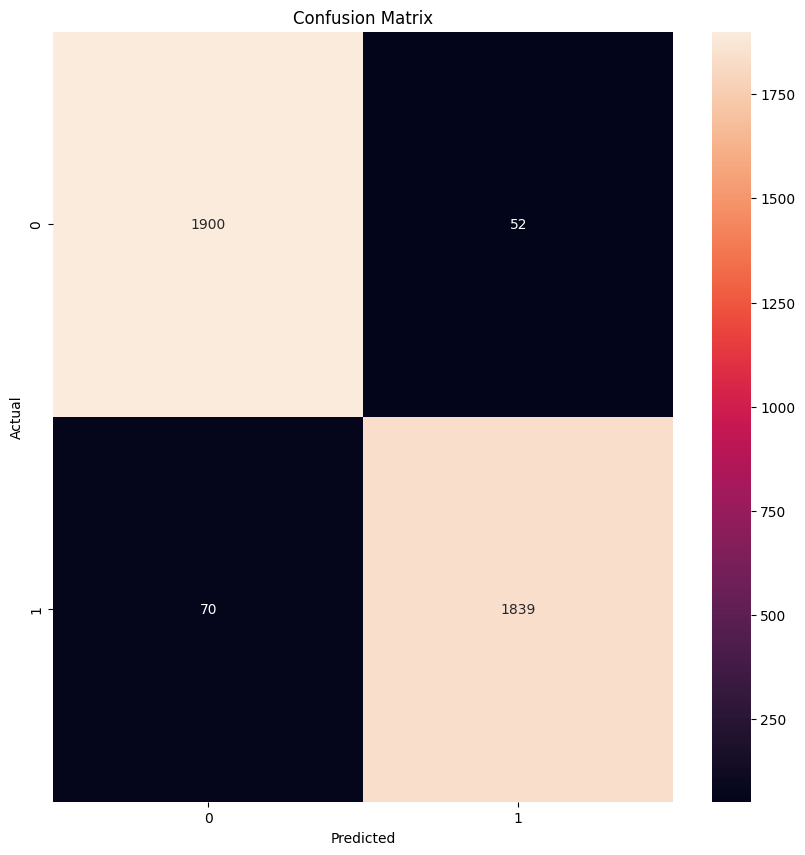

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')